# 경감지표
## 학교500M내 CCTV개수, 학교500M내 경찰관서수, 학교폭력교육시간

In [1]:
import pandas as pd
import warnings 
# import geopandas as gpd
import numpy as np
# from shapely.geometry import Polygon, LineString, Point
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# matplotlib 한글 처리
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [2]:
# 데이터 불어오기 
high_school = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\서울특별시_스케일링_고등학교지표_230131.csv",index_col = 0)
high_school.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '수정일', '위도', '경도',
       '교실안', '특별실,방과후 교실 등', '복도,계단', '화장실', '운동장,체육관,강당 등', '급식실,매점 등',
       '기숙사', '학원이나학원 근처', '집이나집 근처', 'PC방,노래방,오락실 등', '공원, 놀이터,골목, 공터,뒷산 등',
       '학교 밖체험활동 장소', '사이버공간', '피해장소_기타', '강요', '금품갈취', '신체폭력', '사이버폭력',
       '집단따돌림', '피해유형_기타', '등교시간', '수업시간', '쉬는시간', '점심시간', '학교 안방과후 시간',
       '하교시간', '학교 밖체험활동 시간', '학교 일과가끝난 후', '피해시간_기타', '평균 교육 시간(1학급당)',
       '나의보호자나친척', '학교선생님', '학교상담실선생님', '학교폭력신고함이나학교 익명게시판', '친구나선·후배',
       '학교전담경찰관,경찰', '117학교폭력신고센터', '학교 밖상담 기관', '아무에게도알리지않음', '피해 응답 학생 수',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '저소득', '중간', '고소득',
       '생활인구수', '다문화가족', '국제결혼가정', '외국인가정', '단란주점수', '성인게임장수', '술집수', '유흥주점수',
       '총 신고 수', '청소년비행신고수', '학교

In [3]:
alleviate = high_school[['학교명','평균 교육 시간(1학급당)','500m_inner_police_dept', '500m_inner_cctv']]
alleviate

,학교명,평균 교육 시간(1학급당),500m_inner_police_dept,500m_inner_cctv
0,가락고등학교,147.75,0,102
1,가재울고등학교,100.00,0,137
2,강동고등학교,30.65,0,51
3,강서고등학교,237.30,1,299
4,강서공업고등학교,187.50,1,98
...,...,...,...,...
315,효문고등학교,263.60,0,109
316,휘경공업고등학교,187.90,1,99
317,휘경여자고등학교,44.80,1,136
318,휘문고등학교,4.60,0,191


In [4]:
total=alleviate.loc[:,['평균 교육 시간(1학급당)','500m_inner_police_dept', '500m_inner_cctv']]
total

,평균 교육 시간(1학급당),500m_inner_police_dept,500m_inner_cctv
0,147.75,0,102
1,100.00,0,137
2,30.65,0,51
3,237.30,1,299
4,187.50,1,98
...,...,...,...
315,263.60,0,109
316,187.90,1,99
317,44.80,1,136
318,4.60,0,191


In [5]:
labels= np.array(alleviate['학교명'])

# 표준화

In [6]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels
total_sd.head()

,0,1,2
가락고등학교,-0.086255,-0.658577,-0.435117
가재울고등학교,-0.428581,-0.658577,0.020801
강동고등학교,-0.925760,-0.658577,-1.099455
강서고등학교,0.555741,1.013999,2.131052
강서공업고등학교,0.198718,1.013999,-0.487222


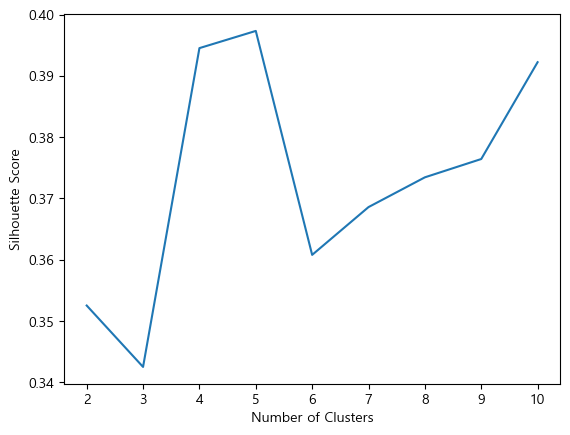

In [7]:
# KMeans clustering with different number of clusters
scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=700)
    kmeans.fit(total_sd.iloc[:,:3])
    score = silhouette_score(total_sd.iloc[:,:3], kmeans.labels_)
    scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Elbow Method(Standard Scaler)

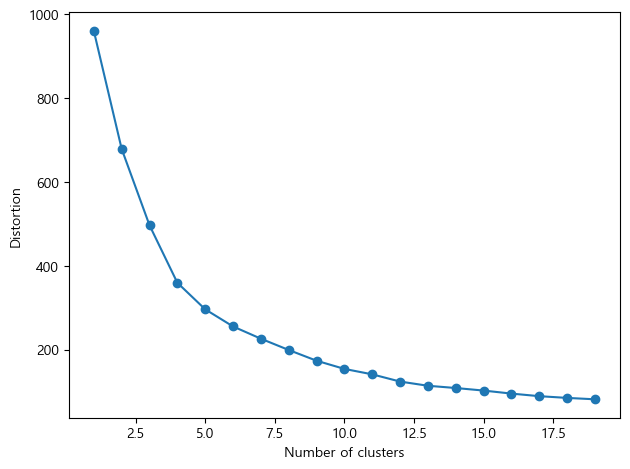

In [8]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [9]:
np.random.seed(1234)
total_sd_arr = total_sd.values

# k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters=5, random_state=2021).fit(total_sd_arr)
kmeans.cluster_centers_

array([[-0.40184794, -0.65857656, -0.56314054],
       [-0.07258563,  1.85028654,  1.41721395],
       [ 1.9183269 , -0.23153604, -0.29071982],
       [-0.35464655,  1.09002499, -0.32932821],
       [-0.26817523, -0.65857656,  1.32581762]])

# 군집화

In [10]:
total_sd['cluster'] = kmeans.labels_
total_sd

,0,1,2,cluster
가락고등학교,-0.086255,-0.658577,-0.435117,0
가재울고등학교,-0.428581,-0.658577,0.020801,0
강동고등학교,-0.925760,-0.658577,-1.099455,0
강서고등학교,0.555741,1.013999,2.131052,1
강서공업고등학교,0.198718,1.013999,-0.487222,3
...,...,...,...,...
효문고등학교,0.744290,-0.658577,-0.343933,0
휘경공업고등학교,0.201586,1.013999,-0.474196,3
휘경여자고등학교,-0.824317,1.013999,0.007775,3
휘문고등학교,-1.112516,-0.658577,0.724218,4


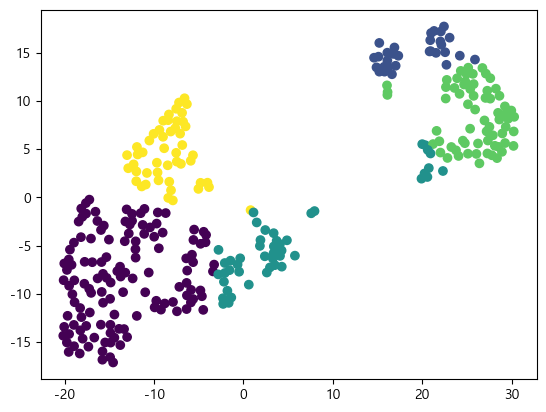

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100,random_state=900)
transformed = model.fit_transform(total_sd.iloc[:,:3])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [12]:
total_sd.groupby('cluster').mean()

,0,1,2
cluster,,,
0,-0.401848,-0.658577,-0.563141
1,-0.072586,1.850287,1.417214
2,1.918327,-0.231536,-0.290720
3,-0.354647,1.090025,-0.329328
4,-0.268175,-0.658577,1.325818


---

In [13]:
Alleviate_score = total_sd.groupby('cluster').mean()
Alleviate_score

,0,1,2
cluster,,,
0,-0.401848,-0.658577,-0.563141
1,-0.072586,1.850287,1.417214
2,1.918327,-0.231536,-0.290720
3,-0.354647,1.090025,-0.329328
4,-0.268175,-0.658577,1.325818


In [14]:
Alleviate_score.reset_index(inplace=True)
Alleviate_score.rename(columns={'index': '학교명', 0: '평균 교육 시간(1학급당)', 1: '500m_inner_police_dept', 2: '500m_inner_cctv'}, inplace=True)
Alleviate_score

,cluster,평균 교육 시간(1학급당),500m_inner_police_dept,500m_inner_cctv
0,0,-0.401848,-0.658577,-0.563141
1,1,-0.072586,1.850287,1.417214
2,2,1.918327,-0.231536,-0.290720
3,3,-0.354647,1.090025,-0.329328
4,4,-0.268175,-0.658577,1.325818


# 결과해석
cluster0 : 5 제일 안전하지 않음 20
cluster1 : 1 제일 안전 100
cluster2 : 2 안전 80
cluster3 : 4 안전하지 않음 40
cluster4 : 3 보통 60

In [15]:
total_sd.reset_index(inplace=True)

In [16]:
total_sd = total_sd[['index','cluster']]
total_sd

,index,cluster
0,가락고등학교,0
1,가재울고등학교,0
2,강동고등학교,0
3,강서고등학교,1
4,강서공업고등학교,3
...,...,...
315,효문고등학교,0
316,휘경공업고등학교,3
317,휘경여자고등학교,3
318,휘문고등학교,4


In [18]:
total_sd["경감지표_score"] = [
    20 if x == 0 else
     100 if x == 1 else 
    80 if x == 2 else 
    40 if x == 3 else  
    60 for x in total_sd.cluster]
total_sd

,index,cluster,경감지표_score
0,가락고등학교,0,20
1,가재울고등학교,0,20
2,강동고등학교,0,20
3,강서고등학교,1,100
4,강서공업고등학교,3,40
...,...,...,...
315,효문고등학교,0,20
316,휘경공업고등학교,3,40
317,휘경여자고등학교,3,40
318,휘문고등학교,4,60


In [19]:
total_sd["경감지표_학교폭력위험도"] = [
    "매우 안전하지 않음" if x == 0 else
    "매우 안전" if x == 1 else 
    "안전" if x == 2 else 
    "안전하지 않음" if x == 3 else  
    "보통" for x in total_sd.cluster]
total_sd

,index,cluster,경감지표_score,경감지표_학교폭력위험도
0,가락고등학교,0,20,매우 안전하지 않음
1,가재울고등학교,0,20,매우 안전하지 않음
2,강동고등학교,0,20,매우 안전하지 않음
3,강서고등학교,1,100,매우 안전
4,강서공업고등학교,3,40,안전하지 않음
...,...,...,...,...
315,효문고등학교,0,20,매우 안전하지 않음
316,휘경공업고등학교,3,40,안전하지 않음
317,휘경여자고등학교,3,40,안전하지 않음
318,휘문고등학교,4,60,보통


In [20]:
total_sd.rename(columns = {'index':'학교명','cluster':'경감지표_cluster'},inplace=True)
total_sd

,학교명,경감지표_cluster,경감지표_score,경감지표_학교폭력위험도
0,가락고등학교,0,20,매우 안전하지 않음
1,가재울고등학교,0,20,매우 안전하지 않음
2,강동고등학교,0,20,매우 안전하지 않음
3,강서고등학교,1,100,매우 안전
4,강서공업고등학교,3,40,안전하지 않음
...,...,...,...,...
315,효문고등학교,0,20,매우 안전하지 않음
316,휘경공업고등학교,3,40,안전하지 않음
317,휘경여자고등학교,3,40,안전하지 않음
318,휘문고등학교,4,60,보통


In [21]:
# 저장 후 주석처리 
total_sd.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_경감지표.csv")

# 경감지표(alleviate_featuers)

In [22]:
data = pd.merge(alleviate, total_sd, on=['학교명'], how='outer', sort=True)
data.columns

Index(['학교명', '평균 교육 시간(1학급당)', '500m_inner_police_dept', '500m_inner_cctv',
       '경감지표_cluster', '경감지표_score', '경감지표_학교폭력위험도'],
      dtype='object')

In [23]:
alleviate_featuers = data[['학교명', '평균 교육 시간(1학급당)', '500m_inner_police_dept', '500m_inner_cctv', '경감지표_score',
       '경감지표_cluster', '경감지표_학교폭력위험도']]
alleviate_featuers

,학교명,평균 교육 시간(1학급당),500m_inner_police_dept,500m_inner_cctv,경감지표_score,경감지표_cluster,경감지표_학교폭력위험도
0,가락고등학교,147.75,0,102,20,0,매우 안전하지 않음
1,가재울고등학교,100.00,0,137,20,0,매우 안전하지 않음
2,강동고등학교,30.65,0,51,20,0,매우 안전하지 않음
3,강서고등학교,237.30,1,299,100,1,매우 안전
4,강서공업고등학교,187.50,1,98,40,3,안전하지 않음
...,...,...,...,...,...,...,...
315,효문고등학교,263.60,0,109,20,0,매우 안전하지 않음
316,휘경공업고등학교,187.90,1,99,40,3,안전하지 않음
317,휘경여자고등학교,44.80,1,136,40,3,안전하지 않음
318,휘문고등학교,4.60,0,191,60,4,보통


In [24]:
# 저장 후 주석처리 
alleviate_featuers.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_경감지표_alleviate_features.csv")